Let's model the angle of attack response $\alpha$ of an aircraft given elevator input $\varepsilon$. We will assume that the aircraft is very "squirrelly"; we will model it as a damped harmonic oscillator with a period of $1$ second and a Q factor of $50$. We will assume that the elevator's limits are from $-1$ (full nose down) to $1$ (full nose up), and the former commands an angle of attack of $-5$, and the latter commands an angle of attack of $10$. (We'll leave out the degree sign.) Finally, we'll assume that the elevator input has a latency of 0.3 seconds (slightly more than one quarter phase of the oscillator), and is slew rate limited, taking 1 second to travel from stop to stop.

In [1]:
from aircraft_simulator import AircraftSimulator
import matplotlib.pyplot as plt

In [2]:
simulator = AircraftSimulator()
sim_length = 20
simulator.run_sim(sim_length)

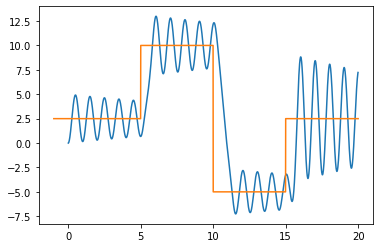

In [3]:
plt.figure().patch.set_facecolor('white')
plt.plot(simulator.alpha_nparray[:,0], simulator.alpha_nparray[:,1])
commanded_alpha = (simulator.elevator_nparray[:,1] * simulator.alpha_elevator_slope) + simulator.alpha_elevator_yintercept
plt.plot(simulator.elevator_nparray[:,0], commanded_alpha)
plt.show()